In [1]:
import cv2
import numpy as np


def readImagesAndTimes():
    times = np.array([1 / 30.0, 0.25, 2.5, 15.0], dtype=np.float32)

    filenames = ["d:/computervision/img_0.jpg", "d:/computervision/img_1.jpg", "d:/computervision/img_2.jpg", "d:/computervision/img_3.jpg"]

    images = []
    for filename in filenames:
        im = cv2.imread(filename)
        images.append(im)

    return images, times


In [2]:
    print("Reading images ... ")

    images, times = readImagesAndTimes()

Reading images ... 


In [3]:
    # Align input images
    print("Aligning images ... ")
    alignMTB = cv2.createAlignMTB()
    alignMTB.process(images, images)

Aligning images ... 


In [4]:
    # Obtain Camera Response Function (CRF)
    print("Calculating Camera Response Function (CRF) ... ")
    calibrateDebevec = cv2.createCalibrateDebevec()
    responseDebevec = calibrateDebevec.process(images, times)

Calculating Camera Response Function (CRF) ... 


In [5]:
    # Merge images into an HDR linear image
    print("Merging images into one HDR image ... ")
    mergeDebevec = cv2.createMergeDebevec()
    hdrDebevec = mergeDebevec.process(images, times, responseDebevec)
    # Save HDR image.
    cv2.imwrite("d:/computervision/hdrDebevec.hdr", hdrDebevec)
    
    print("saved hdrDebevec.hdr ")

Merging images into one HDR image ... 
saved hdrDebevec.hdr 


Tonemaping using Mantiuk's method ... 
saved ldr-Mantiuk.jpg


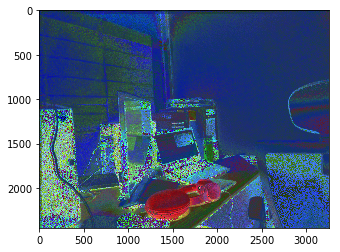

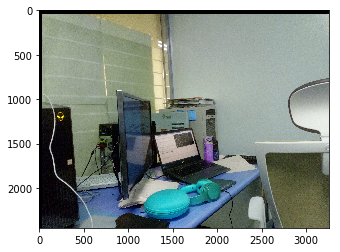

In [17]:
    # Tonemap using Mantiuk's method to obtain 24-bit color image
    print("Tonemaping using Mantiuk's method ... ")
    tonemapMantiuk = cv2.createTonemapMantiuk(2.2, 0.85, 1.2)
    ldrMantiuk = tonemapMantiuk.process(hdrDebevec)
    ldrMantiuk = 3 * ldrMantiuk
    
    import matplotlib.pyplot as pl
    pl.figure()
    pl.imshow(ldrMantiuk*2 )
    pl.figure()
    pl.imshow(images[0])
    print("saved ldr-Mantiuk.jpg")